<font color=black size=5 face=雅黑>填充NAA/將時間合併成一列/將其中一列數據讀熱編碼/將數據轉變成array</font>

In [70]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('./123.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [7]:
data['pm2.5'].isna().sum()

2067

In [8]:
data=data.iloc[24:].fillna(method='ffill') ########將NAH的數值 填充##############

In [9]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [10]:
import datetime

In [11]:
###########將日期合併成一項 並且刪除原本的###################

In [12]:
data['tm']=data.apply(lambda x:datetime.datetime(year =x['year'],
                                      month=x['month']
                                     ,day=x['day'],
                                     hour=x['hour']),
           axis=1
                                  )

In [13]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,tm
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


In [14]:
data= data.drop(columns=['No'])

In [15]:
data=data.set_index('tm') ######將TM 變成 index

In [16]:
data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
tm,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [17]:
data.cbwd.unique()


array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [18]:
data=data.join(pd.get_dummies(data.cbwd)) #########將一列讀熱編碼

In [19]:
data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,0,1,0,0


In [20]:
del data['cbwd']

In [45]:
del data['month']

In [46]:
del data['day']

In [47]:
del data['hour']

In [48]:
data

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


#########################

<AxesSubplot:xlabel='tm'>

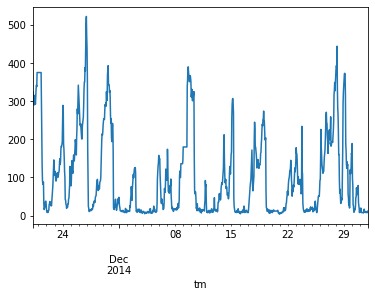

In [23]:
data['pm2.5'][-1000:].plot()

#######數據處理#####


In [88]:
data_=[]
seq_length=5*24  ###參考5天數據
delay=24  ###預測第6天

In [89]:
for i in range(len(data)-seq_length-delay):
    data_.append(data.iloc[i:i+seq_length+delay])     ####將數據變成list

In [90]:
data_[0]

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2010-01-07 19:00:00,67.0,-18,-11.0,1033.0,1.79,0,0,0,1,0,0
2010-01-07 20:00:00,106.0,-19,-15.0,1032.0,1.79,0,0,1,0,0,0
2010-01-07 21:00:00,159.0,-19,-14.0,1032.0,0.45,0,0,0,0,0,1


In [91]:
data_1=np.array([df.values for df in data_])   #######將數據轉成array

In [92]:
data_1.shape

(43656, 144, 11)

In [93]:
np.random.shuffle(data_1)

In [131]:
data_

[                     pm2.5  DEWP  TEMP    PRES   Iws  Is  Ir  NE  NW  SE  cv
 tm                                                                          
 2010-01-02 00:00:00  129.0   -16  -4.0  1020.0  1.79   0   0   0   0   1   0
 2010-01-02 01:00:00  148.0   -15  -4.0  1020.0  2.68   0   0   0   0   1   0
 2010-01-02 02:00:00  159.0   -11  -5.0  1021.0  3.57   0   0   0   0   1   0
 2010-01-02 03:00:00  181.0    -7  -5.0  1022.0  5.36   1   0   0   0   1   0
 2010-01-02 04:00:00  138.0    -7  -5.0  1022.0  6.25   2   0   0   0   1   0
 ...                    ...   ...   ...     ...   ...  ..  ..  ..  ..  ..  ..
 2010-01-07 19:00:00   67.0   -18 -11.0  1033.0  1.79   0   0   0   1   0   0
 2010-01-07 20:00:00  106.0   -19 -15.0  1032.0  1.79   0   0   1   0   0   0
 2010-01-07 21:00:00  159.0   -19 -14.0  1032.0  0.45   0   0   0   0   0   1
 2010-01-07 22:00:00  198.0   -21 -14.0  1032.0  1.34   0   0   0   0   0   1
 2010-01-07 23:00:00  190.0   -21 -16.0  1032.0  2.23   0   0   

In [95]:
data_1

array([[[ 12., -19.,   6., ...,   1.,   0.,   0.],
        [ 10., -19.,   6., ...,   1.,   0.,   0.],
        [ 14., -19.,   5., ...,   1.,   0.,   0.],
        ...,
        [ 44., -25.,   4., ...,   0.,   0.,   1.],
        [ 25., -25.,   4., ...,   0.,   0.,   1.],
        [ 29., -25.,   5., ...,   0.,   0.,   1.]],

       [[107.,  14.,  27., ...,   0.,   0.,   0.],
        [ 91.,  13.,  29., ...,   0.,   0.,   0.],
        [ 71.,  13.,  31., ...,   0.,   0.,   1.],
        ...,
        [  5.,  12.,  13., ...,   0.,   0.,   0.],
        [ 20.,  12.,  13., ...,   0.,   0.,   0.],
        [  5.,  12.,  14., ...,   0.,   0.,   0.]],

       [[ 51., -20.,  -7., ...,   1.,   0.,   0.],
        [ 57., -18.,  -8., ...,   1.,   0.,   0.],
        [ 50., -19.,  -9., ...,   1.,   0.,   0.],
        ...,
        [ 26., -21.,  -8., ...,   1.,   0.,   0.],
        [ 49., -21.,  -6., ...,   1.,   0.,   0.],
        [ 52., -20.,  -5., ...,   1.,   0.,   0.]],

       ...,

       [[ 38.,  -7.,   9

In [96]:
x=data_1[:,:5*24,:]

In [97]:
y=data_1[:,-1,0]

In [98]:
x.shape

(43656, 120, 11)

In [125]:
data_1[1,-1,0]

5.0

In [127]:
data_1[1]

array([[107.,  14.,  27., ...,   0.,   0.,   0.],
       [ 91.,  13.,  29., ...,   0.,   0.,   0.],
       [ 71.,  13.,  31., ...,   0.,   0.,   1.],
       ...,
       [  5.,  12.,  13., ...,   0.,   0.,   0.],
       [ 20.,  12.,  13., ...,   0.,   0.,   0.],
       [  5.,  12.,  14., ...,   0.,   0.,   0.]])

In [99]:
data_1.shape

(43656, 144, 11)

In [100]:
from sklearn.model_selection import train_test_split
##(input_shape_num,1,2)

X_train, X_test, Y_train , Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [101]:
X_train

array([[[ 17., -20.,  -7., ...,   1.,   0.,   0.],
        [ 17., -22.,  -8., ...,   1.,   0.,   0.],
        [ 15., -23.,  -8., ...,   1.,   0.,   0.],
        ...,
        [ 22., -18.,  -3., ...,   0.,   1.,   0.],
        [ 22., -16.,  -9., ...,   0.,   0.,   1.],
        [ 22., -16.,  -8., ...,   0.,   0.,   1.]],

       [[155.,  10.,  13., ...,   0.,   1.,   0.],
        [168.,  10.,  13., ...,   0.,   1.,   0.],
        [155.,   9.,  13., ...,   0.,   0.,   1.],
        ...,
        [ 75.,   1.,   5., ...,   1.,   0.,   0.],
        [ 50.,   2.,   9., ...,   0.,   0.,   1.],
        [ 51.,   2.,  11., ...,   0.,   0.,   1.]],

       [[ 55., -14.,  -3., ...,   0.,   0.,   1.],
        [ 68., -14.,  -2., ...,   0.,   0.,   1.],
        [ 58., -14.,  -3., ...,   1.,   0.,   0.],
        ...,
        [125., -24.,  -2., ...,   0.,   0.,   0.],
        [122., -22.,  -3., ...,   0.,   0.,   0.],
        [ 92., -20.,  -4., ...,   0.,   0.,   1.]],

       ...,

       [[ 87.,  12.,  26

In [102]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)

In [80]:
X_train.shape

(34924, 120, 11)

In [103]:
X_train=(X_train-mean)/std

In [105]:
X_train[0]

array([[-0.88580629, -1.51599105, -1.600825  , ...,  1.45102023,
        -0.73207311, -0.52104647],
       [-0.88449462, -1.6547279 , -1.68287604, ...,  1.45149613,
        -0.73336536, -0.5226453 ],
       [-0.90672874, -1.72420533, -1.68234078, ...,  1.44589746,
        -0.73438133, -0.52033565],
       ...,
       [-0.82770314, -1.383678  , -1.28279778, ..., -0.69292431,
         1.36762097, -0.52162391],
       [-0.82815101, -1.2449528 , -1.77805734, ..., -0.69088824,
        -0.73068956,  1.9102604 ],
       [-0.82948207, -1.24487571, -1.69460577, ..., -0.68953184,
        -0.73216538,  1.90961267]])

In [104]:
X_test=(X_test-mean)/std

In [77]:
model=keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [81]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [106]:
history=model.fit(X_train,Y_train,batch_size=128,epochs=50,validation_data=(X_test,Y_test))

Epoch 1/50
273/273 [==============================] - 2s 8ms/step - loss: 8097.8096 - mae: 65.5163 - val_loss: 6835.2969 - val_mae: 60.8783
Epoch 2/50
273/273 [==============================] - 1s 3ms/step - loss: 6641.4590 - mae: 59.9126 - val_loss: 6536.4233 - val_mae: 59.1474
Epoch 3/50
273/273 [==============================] - 1s 3ms/step - loss: 6323.6606 - mae: 58.4131 - val_loss: 6374.1519 - val_mae: 59.1736
Epoch 4/50
273/273 [==============================] - 1s 3ms/step - loss: 6114.0464 - mae: 57.4401 - val_loss: 6263.0107 - val_mae: 58.9555
Epoch 5/50
273/273 [==============================] - 1s 3ms/step - loss: 5957.6338 - mae: 56.6529 - val_loss: 6126.1489 - val_mae: 57.8265
Epoch 6/50
273/273 [==============================] - 1s 3ms/step - loss: 5815.7310 - mae: 55.9419 - val_loss: 6079.1025 - val_mae: 57.6849
Epoch 7/50
273/273 [==============================] - 1s 3ms/step - loss: 5693.7168 - mae: 55.3456 - val_loss: 5987.1924 - val_mae: 57.0346
Epoch 8/50
273/273 [

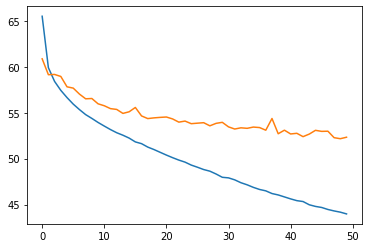

In [107]:
plt.plot(history.epoch,history.history['mae'])
plt.plot(history.epoch,history.history['val_mae'])

LSTM###

In [109]:
model=keras.Sequential()
model.add(tf.keras.layers.LSTM(32,input_shape=(X_train.shape[1:])))
model.add(tf.keras.layers.Dense(1))

In [110]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history=model.fit(X_train,Y_train,batch_size=128,epochs=150,validation_data=(X_test,Y_test))

Epoch 1/150
273/273 [==============================] - 5s 10ms/step - loss: 17274.9547 - mae: 93.4005 - val_loss: 14994.6494 - val_mae: 83.1925
Epoch 2/150
273/273 [==============================] - 2s 8ms/step - loss: 14768.9086 - mae: 81.5960 - val_loss: 13594.5703 - val_mae: 77.3268
Epoch 3/150
273/273 [==============================] - 2s 8ms/step - loss: 13391.9899 - mae: 76.5153 - val_loss: 12461.3330 - val_mae: 73.1846
Epoch 4/150
273/273 [==============================] - 2s 8ms/step - loss: 12376.9024 - mae: 72.8928 - val_loss: 11527.5693 - val_mae: 70.0847
Epoch 5/150
273/273 [==============================] - 2s 8ms/step - loss: 11285.2495 - mae: 69.8228 - val_loss: 10758.2539 - val_mae: 67.8674
Epoch 6/150
273/273 [==============================] - 2s 8ms/step - loss: 10495.3892 - mae: 67.1881 - val_loss: 10133.7969 - val_mae: 66.3855
Epoch 7/150
273/273 [==============================] - 2s 8ms/step - loss: 10305.1071 - mae: 67.0902 - val_loss: 9628.5713 - val_mae: 65.3989

273/273 [==============================] - 2s 8ms/step - loss: 6259.6544 - mae: 57.1409 - val_loss: 6237.9248 - val_mae: 56.4856
Epoch 59/150
273/273 [==============================] - 2s 8ms/step - loss: 6230.5792 - mae: 56.5664 - val_loss: 6102.7734 - val_mae: 57.1106
Epoch 60/150
273/273 [==============================] - 2s 8ms/step - loss: 5983.2317 - mae: 55.7643 - val_loss: 6007.9570 - val_mae: 56.1289
Epoch 61/150
273/273 [==============================] - 2s 8ms/step - loss: 6100.7820 - mae: 56.3335 - val_loss: 6080.8281 - val_mae: 56.8112
Epoch 62/150
273/273 [==============================] - 2s 8ms/step - loss: 6158.1934 - mae: 56.7644 - val_loss: 6220.1167 - val_mae: 57.0367
Epoch 63/150
273/273 [==============================] - 2s 8ms/step - loss: 6136.1957 - mae: 56.8872 - val_loss: 6084.3813 - val_mae: 56.3760
Epoch 64/150
273/273 [==============================] - 2s 8ms/step - loss: 6271.2825 - mae: 57.8187 - val_loss: 6082.5518 - val_mae: 56.8697
Epoch 65/150
273/27

273/273 [==============================] - 2s 8ms/step - loss: 5426.4971 - mae: 53.0117 - val_loss: 5470.6748 - val_mae: 53.7625
Epoch 116/150
273/273 [==============================] - 2s 8ms/step - loss: 5294.7039 - mae: 52.9866 - val_loss: 5598.9556 - val_mae: 54.1580
Epoch 117/150
273/273 [==============================] - 2s 8ms/step - loss: 5552.6780 - mae: 53.3016 - val_loss: 6051.9922 - val_mae: 54.5839
Epoch 118/150
273/273 [==============================] - 2s 8ms/step - loss: 5851.3386 - mae: 54.1379 - val_loss: 5782.2080 - val_mae: 54.8680
Epoch 119/150
273/273 [==============================] - 2s 8ms/step - loss: 5798.6078 - mae: 54.2445 - val_loss: 7299.4258 - val_mae: 63.3903
Epoch 120/150
273/273 [==============================] - 2s 8ms/step - loss: 6591.2741 - mae: 58.8752 - val_loss: 5843.6577 - val_mae: 55.1729
Epoch 121/150
273/273 [==============================] - 2s 8ms/step - loss: 5614.3391 - mae: 54.1967 - val_loss: 5669.5669 - val_mae: 54.2763
Epoch 122/150

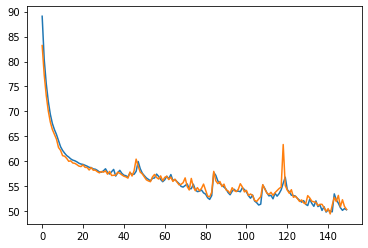

In [112]:
plt.plot(history.epoch,history.history['mae'])
plt.plot(history.epoch,history.history['val_mae'])

In [118]:
model=keras.Sequential()
model.add(tf.keras.layers.LSTM(32,input_shape=(X_train.shape[1:]),return_sequences=True))
model.add(tf.keras.layers.LSTM(32,return_sequences=True))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1))

In [119]:
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)#########查看val_loss ,經過 patience=3  個 有沒有降低 
                                                                         # 沒有就降低 factor=0.5倍,最低 min_lr=0.000001

In [120]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history=model.fit(X_train,Y_train,batch_size=128,epochs=150,validation_data=(X_test,Y_test),callbacks=[lr_reduce])

Epoch 1/150
273/273 [==============================] - 10s 21ms/step - loss: 16862.4278 - mae: 91.1762 - val_loss: 14653.6904 - val_mae: 81.6584
Epoch 2/150
273/273 [==============================] - 5s 18ms/step - loss: 14269.2599 - mae: 80.3766 - val_loss: 13373.6992 - val_mae: 76.4789
Epoch 3/150
273/273 [==============================] - 5s 18ms/step - loss: 12978.6382 - mae: 75.2457 - val_loss: 12312.5547 - val_mae: 72.6717
Epoch 4/150
273/273 [==============================] - 5s 18ms/step - loss: 12175.1658 - mae: 72.5344 - val_loss: 11430.4844 - val_mae: 69.7847
Epoch 5/150
273/273 [==============================] - 5s 18ms/step - loss: 11485.3644 - mae: 70.0274 - val_loss: 10699.7139 - val_mae: 67.7174
Epoch 6/150
273/273 [==============================] - 5s 18ms/step - loss: 10544.0995 - mae: 67.3057 - val_loss: 10099.3398 - val_mae: 66.3133
Epoch 7/150
273/273 [==============================] - 5s 18ms/step - loss: 9995.1576 - mae: 65.8883 - val_loss: 9614.3691 - val_mae: 6

273/273 [==============================] - 7s 26ms/step - loss: 2984.7832 - mae: 36.2314 - val_loss: 3123.1824 - val_mae: 36.8797
Epoch 59/150
273/273 [==============================] - 7s 26ms/step - loss: 3002.1247 - mae: 35.8516 - val_loss: 3400.0942 - val_mae: 39.2989
Epoch 60/150
273/273 [==============================] - 7s 26ms/step - loss: 3081.3164 - mae: 36.4777 - val_loss: 3199.7573 - val_mae: 37.3490
Epoch 61/150
273/273 [==============================] - 7s 27ms/step - loss: 2781.1052 - mae: 34.8247 - val_loss: 3099.3647 - val_mae: 37.1938
Epoch 62/150
273/273 [==============================] - 7s 27ms/step - loss: 2823.1804 - mae: 35.1002 - val_loss: 3083.6943 - val_mae: 37.0463
Epoch 63/150
273/273 [==============================] - 7s 27ms/step - loss: 2730.9100 - mae: 34.4184 - val_loss: 2886.1663 - val_mae: 35.6680
Epoch 64/150
273/273 [==============================] - 7s 27ms/step - loss: 2560.8227 - mae: 33.2278 - val_loss: 2934.6685 - val_mae: 35.8137
Epoch 65/150

273/273 [==============================] - 8s 29ms/step - loss: 1415.9007 - mae: 24.8262 - val_loss: 1790.4069 - val_mae: 27.8942
Epoch 116/150
273/273 [==============================] - 9s 32ms/step - loss: 1475.3647 - mae: 24.9920 - val_loss: 1792.6879 - val_mae: 28.0053
Epoch 117/150
273/273 [==============================] - 8s 29ms/step - loss: 1452.2861 - mae: 25.0782 - val_loss: 1786.9423 - val_mae: 27.9062
Epoch 118/150
273/273 [==============================] - 8s 28ms/step - loss: 1437.7198 - mae: 24.8712 - val_loss: 1781.2972 - val_mae: 27.8852
Epoch 119/150
273/273 [==============================] - 8s 28ms/step - loss: 1569.7166 - mae: 25.2789 - val_loss: 1779.5490 - val_mae: 27.8114
Epoch 120/150
273/273 [==============================] - 8s 28ms/step - loss: 1511.5328 - mae: 25.2625 - val_loss: 1787.3879 - val_mae: 27.9272
Epoch 121/150
273/273 [==============================] - 7s 27ms/step - loss: 1487.4690 - mae: 25.1511 - val_loss: 1782.0321 - val_mae: 27.8319
Epoch 

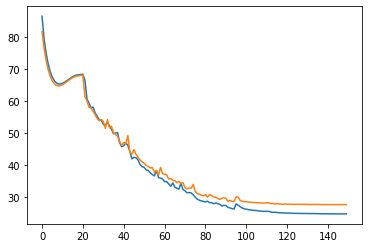

In [121]:
plt.plot(history.epoch,history.history['mae'])
plt.plot(history.epoch,history.history['val_mae'])

使用模型進行預測

In [124]:
model.evaluate(X_test,Y_test,verbose=0)

[1765.5931396484375, 27.712276458740234]

In [138]:
data_test=data[-120:]

In [136]:
data_test=data_test.iloc[:,5:]

In [140]:
data_test=(data_test-mean)/std

In [145]:
data_test=data_test.to_numpy()

In [148]:
data_test=np.expand_dims(data_test,0)

In [150]:
data_test.shape

(1, 120, 11)

In [151]:
model.predict(data_test)

array([[77.21364]], dtype=float32)